In [1]:
ls ..\airflow\plugins\utils

 Volume in drive D is Data
 Volume Serial Number is 60C9-102A

 Directory of D:\Python\udemy_algo_trading_airflow\airflow\plugins\utils

29/03/2022  12:53    <DIR>          .
29/03/2022  12:53    <DIR>          ..
29/03/2022  12:53    <DIR>          __pycache__
27/03/2022  08:56             1,322 db.py
23/02/2022  12:49             1,392 order.py
23/02/2022  12:49             1,724 strategy.py
29/03/2022  12:53             2,196 tinkoff.py
               4 File(s)          6,634 bytes
               3 Dir(s)  35,529,609,216 bytes free


In [2]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [3]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [4]:
def _get_db_url(connector:str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [5]:
db._get_db_url = _get_db_url

In [7]:
data = db.get_data_from_table('ads', 'data')

In [8]:
data

,time,open,high,low,close
0,2021-06-01 07:00:00,67.07,67.07,67.07,67.07
1,2021-06-03 07:00:00,67.81,67.81,67.81,67.81
2,2021-06-04 07:00:00,68.29,68.29,68.29,68.29
3,2021-06-09 07:00:00,68.35,68.35,68.35,68.35
4,2021-06-10 07:00:00,68.35,68.36,68.35,68.36
...,...,...,...,...,...
186,2022-03-22 07:00:00,111.00,114.87,108.49,113.97
187,2022-03-23 07:00:00,114.50,122.21,113.95,122.00
188,2022-03-24 07:00:00,121.45,122.59,118.55,120.35
189,2022-03-25 07:00:00,120.75,120.75,115.17,120.50


In [9]:
SMA_SHORT = 30
SMA_LONG = 100

In [10]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

In [11]:
data

,time,open,high,low,close,sma_short,sma_long
0,2021-06-01 07:00:00,67.07,67.07,67.07,67.07,NaN,NaN
1,2021-06-03 07:00:00,67.81,67.81,67.81,67.81,NaN,NaN
2,2021-06-04 07:00:00,68.29,68.29,68.29,68.29,NaN,NaN
3,2021-06-09 07:00:00,68.35,68.35,68.35,68.35,NaN,NaN
4,2021-06-10 07:00:00,68.35,68.36,68.35,68.36,NaN,NaN
...,...,...,...,...,...,...,...
186,2022-03-22 07:00:00,111.00,114.87,108.49,113.97,98.397333,84.6540
187,2022-03-23 07:00:00,114.50,122.21,113.95,122.00,99.475667,85.0571
188,2022-03-24 07:00:00,121.45,122.59,118.55,120.35,100.427333,85.4536
189,2022-03-25 07:00:00,120.75,120.75,115.17,120.50,101.401333,85.8614


<AxesSubplot:title={'center':'CROSS_SMA: 30 and 100'}>

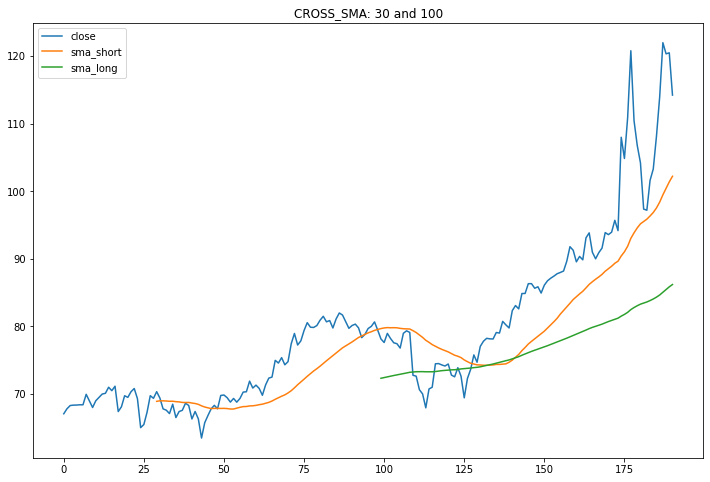

In [12]:
data[['close', 'sma_short', 'sma_long']].plot(figsize=(12,8), title=f'CROSS_SMA: {SMA_SHORT} and {SMA_LONG}')

In [13]:
data['position'] = np.where(data['sma_short'] > data['sma_long'], 1, -1) 

In [14]:
data['position'].value_counts()

-1    107
 1     84
Name: position, dtype: int64

In [15]:
data.tail(10)

,time,open,high,low,close,sma_short,sma_long,position
181,2022-03-15 07:00:00,103.50,103.50,97.30,97.37,95.541667,83.4556,1
182,2022-03-16 07:00:00,100.23,101.98,96.11,97.20,95.877000,83.6208,1
183,2022-03-17 07:00:00,97.50,101.87,96.50,101.62,96.349333,83.8283,1
184,2022-03-18 07:00:00,101.97,106.50,101.97,103.30,96.866000,84.0636,1
185,2022-03-21 07:00:00,103.33,108.94,103.33,108.16,97.538333,84.3342,1
186,2022-03-22 07:00:00,111.00,114.87,108.49,113.97,98.397333,84.6540,1
187,2022-03-23 07:00:00,114.50,122.21,113.95,122.00,99.475667,85.0571,1
188,2022-03-24 07:00:00,121.45,122.59,118.55,120.35,100.427333,85.4536,1
189,2022-03-25 07:00:00,120.75,120.75,115.17,120.50,101.401333,85.8614,1
190,2022-03-28 07:00:00,119.68,119.68,112.82,114.24,102.224000,86.2024,1


In [17]:
 data.head()

,time,open,high,low,close,sma_short,sma_long,position
0,2021-06-01 07:00:00,67.07,67.07,67.07,67.07,NaN,NaN,-1
1,2021-06-03 07:00:00,67.81,67.81,67.81,67.81,NaN,NaN,-1
2,2021-06-04 07:00:00,68.29,68.29,68.29,68.29,NaN,NaN,-1
3,2021-06-09 07:00:00,68.35,68.35,68.35,68.35,NaN,NaN,-1
4,2021-06-10 07:00:00,68.35,68.36,68.35,68.36,NaN,NaN,-1
